In [20]:
#  11/2/2022
# in this notebook we intend to make a model for multiclass classification to compare results and see the deifferences 
# df_MedBIoT_all_4Class.csv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import os
import numpy as np
import pandas as pd           
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

###  the class code:
class 0 = df_mirai_leg
class 1 = df_bashlite_leg
class 2 = df_torii_leg
class 3 = df_mirai_CC
class 4 = df_mirai_spread 
class 5 = df_bashlite_CC 
class 6 = df_bashlite_spread 
class 7 = df_torii_mal 
for this model 
class 0 = Normal
class 1 = mal

### Read my labeled dataset MedBIoT

### The filename of the dataset (df_MedBIoT_all_2Class) in new CSV (df_MedBIoT_all_2Class.csv)

In [21]:

df_MedBIoT_all_4Class= pd.read_csv('df_MedBIoT_all_4Class.csv', header=0)  #from model2-to_make4Classes


In [22]:
df_MedBIoT_all_4Class   # 

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1,Class
0,8.119090,85.262577,2.154520e+02,12.715432,85.430106,2.410619e+02,22.098051,84.712734,2.581714e+02,84.938541,...,0.000000e+00,0.000000e+00,40.981053,81.511474,3.444528e+01,5.869011,81.511474,0.000000e+00,0.000000e+00,0
1,11.929964,516.358444,7.704967e+02,14.033933,516.208241,7.824682e+02,17.496759,516.010545,7.965394e+02,20.063248,...,0.000000e+00,0.000000e+00,62.517881,515.349777,8.389090e+02,28.963926,515.349777,0.000000e+00,0.000000e+00,0
2,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.000000,68.000000,0.000000e+00,1.076384,...,1.270458e+00,1.293847e+00,4.871709,67.205295,9.589746e-01,2.525067,95.077122,-9.089941e-02,-3.988214e-02,0
3,6.132969,60.074786,5.926919e-01,10.054135,60.147825,1.160747e+00,25.528954,60.672014,4.926224e+00,128.740564,...,7.070510e-29,6.347533e-17,409.786387,60.000000,9.094947e-12,0.000003,84.852814,-3.328025e-27,-6.680758e-16,0
4,14.313002,69.235529,2.355523e+02,18.612767,68.970597,2.116271e+02,26.481134,68.730793,1.878978e+02,46.471145,...,-4.330960e+01,-1.086798e-02,2.999976,82.333416,5.028919e+02,188.983417,150.230012,-9.898591e+00,-2.352295e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004818,1.000000,60.000000,9.094947e-13,1.000021,60.000000,9.094947e-13,1.028289,60.000000,0.000000e+00,3.324344,...,1.176888e+00,1.674490e-01,29.275000,61.466348,6.771123e+01,12.520485,86.941095,1.404413e+01,1.808608e-01,3
1004819,1.000000,60.000000,0.000000e+00,1.000017,60.000000,4.547474e-13,1.026472,60.000000,0.000000e+00,3.304983,...,4.612322e-01,1.005622e-01,29.365618,61.540022,4.536901e+01,9.237331,86.909030,9.295905e+00,2.183249e-01,3
1004820,1.000000,60.000000,0.000000e+00,1.000021,60.000000,0.000000e+00,1.028369,60.000000,8.640200e-12,3.340821,...,5.255564e-01,3.791539e-02,29.331388,61.528509,4.504743e+01,9.450701,87.002784,6.382070e+00,1.429157e-01,3
1004821,1.000000,60.000000,4.547474e-13,1.000021,60.000000,0.000000e+00,1.028157,60.000000,4.547474e-13,3.314738,...,2.076003e-01,6.331249e-02,29.192432,61.348654,5.156178e+01,10.596623,86.755628,7.230178e+00,1.292098e-01,3


In [23]:
df_MedBIoT_all_4Class.shape 


(1004823, 101)

In [24]:
X=df_MedBIoT_all_4Class

In [25]:
# shuffle rows of dataframe 
sampler=np.random.permutation(len(X))
data=X.take(sampler)
data

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1,Class
389009,1.000000,60.000000,0.000000e+00,1.000024,60.000000,0.000000e+00,1.028821,60.000000,9.094947e-13,1.966837,...,8.633617e-29,8.490585e-17,12.652086,60.000000,1.364242e-12,0.000003,84.852814,1.637137e-28,6.266975e-17,0
461113,1.997363,66.998680,9.999983e-01,1.998417,66.999208,9.999994e-01,1.999472,66.999736,9.999999e-01,2.076279,...,-1.349577e-01,-7.223472e-02,5.911739,67.078812,3.681462e+00,2.902563,95.086425,2.511108e-01,6.009104e-02,0
283643,24.402642,60.165827,1.299117e+00,40.205068,60.171718,1.344260e+00,118.242845,60.151603,1.229699e+00,1199.357078,...,7.316917e-28,2.544064e-16,11400.988456,60.000000,3.319656e-11,0.000006,95.268043,8.056043e-28,1.466139e-16,0
849853,293.107510,74.000000,6.366463e-12,342.989740,74.000000,3.637979e-12,445.977567,74.000000,3.637979e-12,2446.547915,...,0.000000e+00,0.000000e+00,1.247606,74.000000,0.000000e+00,0.000000,74.000000,0.000000e+00,0.000000e+00,2
594888,15.964270,165.491707,1.504666e+04,17.803796,161.577395,1.415957e+04,22.256661,153.302195,1.223070e+04,44.020215,...,2.252159e-13,1.876225e-09,195.466907,123.903283,4.147035e+03,64.397480,140.385277,1.455500e-03,1.513747e-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824200,169.243836,74.000000,1.818989e-12,238.260934,74.000000,2.728484e-12,362.806718,74.000000,0.000000e+00,648.082260,...,0.000000e+00,0.000000e+00,1.000000,74.000000,0.000000e+00,0.000000,74.000000,0.000000e+00,0.000000e+00,2
996927,1.000000,60.000000,4.547474e-13,1.000021,60.000000,4.547474e-13,1.028218,60.000000,9.094947e-13,3.294530,...,1.107203e-01,7.138555e-02,28.995837,61.077898,3.225298e+01,8.368022,86.520291,8.422636e+00,2.413154e-01,3
827006,103.012399,74.000000,5.456968e-12,134.155376,74.000000,4.547474e-12,297.758914,74.000000,9.094947e-13,3041.357958,...,0.000000e+00,0.000000e+00,2.923424,74.000000,0.000000e+00,0.000000,74.000000,0.000000e+00,0.000000e+00,2
494693,3.107379,62.628510,7.341177e+02,5.163738,66.542779,1.796315e+03,12.872480,71.469737,2.916055e+03,74.620398,...,-3.208888e-31,-2.880771e-19,377.095290,60.000000,7.730705e-12,0.000003,84.852814,5.322305e-29,1.269463e-17,0


In [26]:
#dummy encode labels, store separately
labels_full=pd.get_dummies(data['Class'], prefix='Class')
labels_full.head()

,Class_0,Class_1,Class_2,Class_3
389009,1,0,0,0
461113,1,0,0,0
283643,1,0,0,0
849853,0,0,1,0
594888,0,1,0,0


In [27]:
#drop labels from training dataset
data=data.drop(columns='Class')
data.head()

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_magnitude_0_1,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1
389009,1.000000,60.000000,0.000000e+00,1.000024,60.000000,0.000000e+00,1.028821,60.000000,9.094947e-13,1.966837,...,84.852814,8.633617e-29,8.490585e-17,12.652086,60.000000,1.364242e-12,0.000003,84.852814,1.637137e-28,6.266975e-17
461113,1.997363,66.998680,9.999983e-01,1.998417,66.999208,9.999994e-01,1.999472,66.999736,9.999999e-01,2.076279,...,95.132664,-1.349577e-01,-7.223472e-02,5.911739,67.078812,3.681462e+00,2.902563,95.086425,2.511108e-01,6.009104e-02
283643,24.402642,60.165827,1.299117e+00,40.205068,60.171718,1.344260e+00,118.242845,60.151603,1.229699e+00,1199.357078,...,95.268043,7.316917e-28,2.544064e-16,11400.988456,60.000000,3.319656e-11,0.000006,95.268043,8.056043e-28,1.466139e-16
849853,293.107510,74.000000,6.366463e-12,342.989740,74.000000,3.637979e-12,445.977567,74.000000,3.637979e-12,2446.547915,...,74.000000,0.000000e+00,0.000000e+00,1.247606,74.000000,0.000000e+00,0.000000,74.000000,0.000000e+00,0.000000e+00
594888,15.964270,165.491707,1.504666e+04,17.803796,161.577395,1.415957e+04,22.256661,153.302195,1.223070e+04,44.020215,...,151.614119,2.252159e-13,1.876225e-09,195.466907,123.903283,4.147035e+03,64.397480,140.385277,1.455500e-03,1.513747e-03


In [28]:
#standardize numerical columns
def standardize(df,col):
    df[col]= (df[col]-df[col].mean())/df[col].std()

data_st=data.copy()
for i in (data_st.iloc[:,:-1].columns):
    standardize (data_st,i)

data_st.head()

,MI_dir_5_weight,MI_dir_5_mean,MI_dir_5_std,MI_dir_3_weight,MI_dir_3_mean,MI_dir_3_std,MI_dir_1_weight,MI_dir_1_mean,MI_dir_1_std,MI_dir_0.1_weight,...,HpHp_0.1_magnitude_0_1,HpHp_0.1_covariance_0_1,HpHp_0.1_pcc_0_1,HpHp_0.01_weight_0,HpHp_0.01_mean_0,HpHp_0.01_std_0,HpHp_0.01_radius_0_1,HpHp_0.01_magnitude_0_1,HpHp_0.01_covariance_0_1,HpHp_0.01_pcc_0_1
389009,-0.326315,-0.480408,-0.117606,-0.315750,-0.481146,-0.142996,-0.321746,-0.483371,-0.185956,-0.357381,...,-0.594587,0.085320,-0.000914,-0.279441,-0.480453,-0.125552,-0.519134,-0.596100,0.092954,6.266975e-17
461113,-0.324365,-0.466084,-0.117600,-0.314464,-0.466763,-0.142989,-0.321124,-0.468856,-0.185948,-0.357361,...,-0.576281,0.085311,-0.001005,-0.279826,-0.466137,-0.125522,-0.499597,-0.577885,0.092972,6.009104e-02
283643,-0.280558,-0.480069,-0.117598,-0.265246,-0.480793,-0.142987,-0.246693,-0.483056,-0.185946,-0.142257,...,-0.576040,0.085320,-0.000914,0.371938,-0.480453,-0.125552,-0.519134,-0.577561,0.092954,1.466139e-16
849853,0.244817,-0.451755,-0.117606,0.124796,-0.452376,-0.142996,-0.036841,-0.454340,-0.185956,0.081814,...,-0.613914,0.085320,-0.000914,-0.280093,-0.452140,-0.125552,-0.519134,-0.615418,0.092954,0.000000e+00
594888,-0.297057,-0.264501,-0.023428,-0.294103,-0.272406,-0.041944,-0.308154,-0.289895,-0.087667,-0.349825,...,-0.475697,0.085320,-0.000914,-0.268984,-0.351220,-0.091572,-0.085680,-0.497254,0.092954,1.513747e-03


In [29]:
#training data for the neural net
train_data_st=data_st.values
train_data_st

array([[-3.26315440e-01, -4.80408352e-01, -1.17606378e-01, ...,
        -5.96100082e-01,  9.29541683e-02,  6.26697539e-17],
       [-3.24365382e-01, -4.66084322e-01, -1.17600119e-01, ...,
        -5.77884531e-01,  9.29715951e-02,  6.00910396e-02],
       [-2.80558249e-01, -4.80068958e-01, -1.17598247e-01, ...,
        -5.77561256e-01,  9.29541683e-02,  1.46613902e-16],
       ...,
       [-1.26859290e-01, -4.51754888e-01, -1.17606378e-01, ...,
        -6.15417798e-01,  9.29541683e-02,  0.00000000e+00],
       [-3.22195063e-01, -4.75028643e-01, -1.13011471e-01, ...,
        -5.96100082e-01,  9.29541683e-02,  1.26946326e-17],
       [-3.24458784e-01, -4.80408352e-01, -1.17606378e-01, ...,
        -5.96100082e-01,  9.29541683e-02, -1.02316949e-15]])

In [30]:
#labels for training
labels=labels_full.values
labels

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [31]:
# [10] Validation Technique
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data_st, labels, test_size=0.2)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.125)

print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(703375, 100)
(200965, 100)
(100483, 100)


In [32]:
# new
x_train_cnn = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_validate_cnn = np.reshape(x_validate, (x_validate.shape[0], x_validate.shape[1],1))
print(x_train_cnn.shape)
print(x_test_cnn.shape)
print(x_validate_cnn.shape)


(703375, 100, 1)
(200965, 100, 1)
(100483, 100, 1)


In [33]:
import numpy as np
from tensorflow import keras 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import  Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D
#from tensorflow.keras.utils import np_utils

In [34]:
# Build Model Cross CNN_LSTM
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=5, strides=1, padding='same', input_shape = (train_data_st.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding='same'))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, return_sequences=True))  # returns a sequence of vectors of dimension 16
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(labels.shape[1],activation='softmax'))

modelName = 'Cross_CNN_LSTM_Multiclass'
keras.utils.plot_model(model, './'+modelName+'_Archi.png',show_shapes=True)
model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 100, 128)          768       
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 64)           41024     
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           12416     
                                                                 
 lstm_3 (LSTM)               (None, 100, 16)           3136      
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)        

In [35]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, #lr=0.001)
                                            lr=0.00001)
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

checkpoint = ModelCheckpoint('./'+modelName+'.h5',
                            monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             save_weights_only=True,
                             verbose=1)

In [37]:
epochs = 50 #100
batch_size = 512


In [38]:
history = model.fit(x_train_cnn,y_train, batch_size=batch_size,
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validate_cnn,y_validate),
    #validation_split=0.10,
    callbacks=[learning_rate_reduction, checkpoint] 
)

Epoch 1/50
1373/1373 [==============================] - ETA: 0s - loss: 0.4870 - accuracy: 0.8219
Epoch 1: val_loss improved from inf to 0.22701, saving model to .\Cross_CNN_LSTM_Multiclass.h5
1373/1373 [==============================] - 392s 283ms/step - loss: 0.4870 - accuracy: 0.8219 - val_loss: 0.2270 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 2/50
1373/1373 [==============================] - ETA: 0s - loss: 0.1950 - accuracy: 0.9293
Epoch 2: val_loss improved from 0.22701 to 0.15511, saving model to .\Cross_CNN_LSTM_Multiclass.h5
1373/1373 [==============================] - 382s 278ms/step - loss: 0.1950 - accuracy: 0.9293 - val_loss: 0.1551 - val_accuracy: 0.9443 - lr: 0.0010
Epoch 3/50
1373/1373 [==============================] - ETA: 0s - loss: 0.1521 - accuracy: 0.9455
Epoch 3: val_loss improved from 0.15511 to 0.13751, saving model to .\Cross_CNN_LSTM_Multiclass.h5
1373/1373 [==============================] - 391s 285ms/step - loss: 0.1521 - accuracy: 0.9455 - val_loss: 0.1375

Epoch 26/50
1373/1373 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9917
Epoch 26: val_loss did not improve from 0.02863
1373/1373 [==============================] - 436s 318ms/step - loss: 0.0254 - accuracy: 0.9917 - val_loss: 0.0304 - val_accuracy: 0.9902 - lr: 5.0000e-04
Epoch 27/50
1373/1373 [==============================] - ETA: 0s - loss: 0.0226 - accuracy: 0.9926
Epoch 27: val_loss improved from 0.02863 to 0.02623, saving model to .\Cross_CNN_LSTM_Multiclass.h5
1373/1373 [==============================] - 446s 325ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0262 - val_accuracy: 0.9915 - lr: 5.0000e-04
Epoch 28/50
1373/1373 [==============================] - ETA: 0s - loss: 0.0227 - accuracy: 0.9927
Epoch 28: val_loss did not improve from 0.02623
1373/1373 [==============================] - 428s 312ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0303 - val_accuracy: 0.9907 - lr: 5.0000e-04
Epoch 29/50
1373/1373 [======================

1373/1373 [==============================] - 499s 363ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0152 - val_accuracy: 0.9960 - lr: 1.2500e-04


<ipython-input-39-43f963e4dd48>:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-39-43f963e4dd48>:20: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
<ipython-input-39-43f963e4dd48>:23: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(

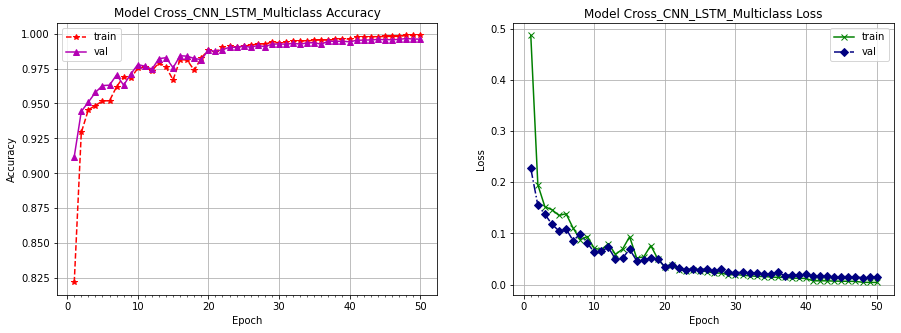

In [39]:
#1. Function to plot model's validation loss and validation accuracy
import pickle
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1), model_history.history['accuracy'], '--*', color = (1,0,0))
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1), model_history.history['val_accuracy'], '-^', color = (0.7,0,0.7))
    axs[0].set_title('Model '+modelName+' Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[0].grid('on')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1), model_history.history['loss'],'-x', color = (0,0.5,0))
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1), model_history.history['val_loss'],  '-.D', color = (0,0,0.5))
    axs[1].set_title('Model '+modelName+' Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    axs[1].grid('on')
    plt.savefig('./'+modelName+'.jpg',dpi=600, quality = 100, optimize = True)
    plt.show()

plot_model_history(history)
with open('./History_'+modelName, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

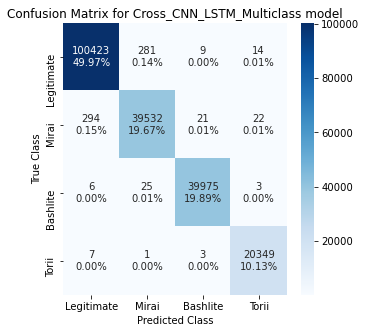

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
import seaborn as sns


y_pred = model.predict(x_test_cnn)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(4,4)


label = ['Legitimate','Mirai','Bashlite','Torii']

plt.figure(figsize=(5,5))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix for '+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [41]:
import random
import pickle
import datetime
from pprint import pprint
from sklearn.metrics import classification_report

print(classification_report(y_test_cm, y_pred_cm, target_names= ['Legitimate','Mirai','Bashlite','Torii'],  digits=4)) # 

loss, accuracy = model.evaluate(x_test_cnn, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

with open('./'+modelName+'_CR.txt','a') as f:
    f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['Legitimate','Mirai','Bashlite','Torii']))
    f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

              precision    recall  f1-score   support

  Legitimate     0.9970    0.9970    0.9970    100727
       Mirai     0.9923    0.9915    0.9919     39869
    Bashlite     0.9992    0.9992    0.9992     40009
       Torii     0.9981    0.9995    0.9988     20360

    accuracy                         0.9966    200965
   macro avg     0.9966    0.9968    0.9967    200965
weighted avg     0.9966    0.9966    0.9966    200965

6281/6281 [==============================] - 84s 13ms/step - loss: 0.0137 - accuracy: 0.9966
Test: accuracy = 0.996586  ;  loss = 0.013716
